# Задание
### Основная часть
* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly
### Дополнительная часть
* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощью инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
from collections import Counter
import re
from datetime import datetime

In [2]:
df = pd.read_excel('domrf.xlsx')

In [3]:
"""Чтобы оценить и описать оставшиеся данные, собираю их в словарь, 
где key - название колонки, value - список уникальных значений внутри"""
uniq_data_dict = {}
for column_name in df.columns:
    uniq_data_dict[column_name] = df[column_name].unique().tolist()

In [4]:
uniq_data_dict

{'Unnamed: 0': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  15

## Описание полей исследуемого датасета
* id - id объекта
* pdId - id объекта
* region - регион, где находится объект
* address - адрес местоположения объекта
* floorMin - самый нижний этаж
* floorMax - самый верхний этаж
* objElemLivingCnt - количество жилых помещений
* objReady100PercDt - дата полной готовности объекта
* wallMaterialShortDesc - материал стен здания
* objLkFinishTypeDesc - тип готовности помещения
* objLkFreePlanDesc - поддерживается ли свободная планировка
* objElemParkingCnt
* objSquareLiving - площадь жилого помещения
* rpdNum - номер проектной декларации
* rpdPdfLink - ссылка на пдф файл с проектной декларацией
* rpdIssueDttm - дата создания проектной декларации
* objLkLatitude - широта нахождения объекта
* objLkLongitude - долгота нахождения объекта
* objCompensFundFlg
* objProblemFlg
* objLkClassDesc
* loadDttm - дата загрузки информации
* photoRenderDTO - информация о фото объекта
* objGuarantyEscrowFlg - гарантия по договору эскроу
* objectType - тип объекта
* miniUrl - ссылка на фото объекта
* residentialBuildings
* newBuildingId - id объекта
* objFloorCnt - этаж помещения
* objFlatCnt - номер квартиры
* objFlatSq - площадь квартиры
* objNonlivElemCnt - количество нежилых помещений
* objStatus - статус объекта
* isAvailableWantLiveHere
* objTransferPlanDt
* objLivCeilingHeight - высота жилого помещения
* objInfrstrBicycleLaneFlg - наличие велосипедной дорожки
* objInfrstrPlaygrndCnt - наличие детской площадки
* objInfrstrSportGroundCnt - наличие спортивной площадки
* objInfrstrTrashAreaCnt - количество баков под мусор
* objInfrstrObjPrkngCnt - количество парковочных мест
* objInfrstrNotObjPrkngCnt - количество парковочных мест вне ЖК
* objInfrstrRampFlg - наличие пандуса
* objInfrstrCurbLoweringFlg - наличие снижающегося бордюра
* objElevatorWheelchairCnt - количество подъемников для инвалидного кресла
* objElevatorPassengerCnt - количество пассажирских лифтов
* objElevatorCargoCnt - количество грузовых лифтов
* soldOutPerc
* objPriceAvg - стоимость объекта
* generalContractorNm
* nonlivFirstFloor - жилой первый этаж или нет
* objectTransportInfo - информация о наличии трпанспортных развязок 
* conclusion - решение
* objLkSaleDepEmail - email для обращения о покупке объекта
* objGreenHouseFlg - является ли объект экологически чистым
* objEnergyEffShortDesc - коэффициент энергетической эффективности объекта
* infrastructureIndexValue
* developer.devId - id компании застройщика
* developer.devShortCleanNm - краткое наименование компании застройщика
* developer.devShortNm
* developer.devFullCleanNm - полное наименование компании застройщика
* developer.problObjCnt
* developer.buildObjCnt
* developer.comissObjCnt
* developer.regRegionDesc - регион регистрации компании застройщика
* developer.devPhoneNum - телефонный номер компании застройщика
* developer.devSite - сайт компании застройщика
* developer.devEmail - email компании застройщика 
* developer.devInn - ИНН компании застройщика
* developer.devOgrn - ОГРН компании застройщика
* developer.devKpp -КПП компании застройщика 
* developer.devLegalAddr - фактический адрес нахождения компании застройщика
* developer.devFactAddr 
* developer.lastRpdId 
* developer.fundGuarantyFlg 
* developer.devOrgRegRegionCd
* developer.devEmplMainFullNm - ФИО представителя компании застройщика
* developer.developerGroupName - название организации застройщика
* developer.orgForm.id - id организационной форма компании застройщика
* developer.orgForm.fullForm - полная форма наименования компании застройщика
* developer.orgForm.shortForm - краткая форма наименования компании застройщика
* developer.companyGroupId
* developer.objGuarantyEscrowFlg - есть ли гарантии пор договорам эскроу
* developer.govFundFlg
* quartography.objLivElem1KCnt
* quartography.objLivElem2KCnt
* quartography.objLivElem3KCnt
* quartography.objLivElem4KCnt
* quartography.objLivElemCnt
* quartography.objLivElemEntrCnt
* quartography.objLivElemEntrFloorAvg
* nameObj - наименование объекта
* transportDistIndex - расстояние от транспорта
* transportDistIndexValue
* metro.id - id станции метро
* metro.name - наименование станции метро
* metro.line - наименование ветки метро
* metro.color - цвет ветки метро
* metro.time - время до метро
* metro.isWalk
* metro.colors - цвета ближайших веток метро
* greenAreaIndexValue - индекс "экологичности" окружающей площади
* airQualityIndexValue - качество воздуха
* complexShortNm - краткое наименование ЖК
* developer.bankruptStage.bankruptStageCd
* developer.bankruptStage.bankruptStageDesc
* developer.bankruptStage.bankruptLawUrl
* developer.orgBankruptMsgDttm - дата признания компании застройщика банкротом

In [5]:
#определяем количество пропущенных данных для каждого столбца
dict(df.isnull().sum())

{'Unnamed: 0': 0,
 'id': 0,
 'pdId': 0,
 'region': 0,
 'address': 1,
 'floorMin': 0,
 'floorMax': 0,
 'objElemLivingCnt': 0,
 'objReady100PercDt': 0,
 'wallMaterialShortDesc': 0,
 'objLkFinishTypeDesc': 0,
 'objLkFreePlanDesc': 0,
 'objElemParkingCnt': 0,
 'objSquareLiving': 0,
 'rpdNum': 0,
 'rpdPdfLink': 0,
 'rpdIssueDttm': 0,
 'objLkLatitude': 0,
 'objLkLongitude': 0,
 'objCompensFundFlg': 0,
 'objProblemFlg': 0,
 'objLkClassDesc': 0,
 'loadDttm': 0,
 'photoRenderDTO': 0,
 'objGuarantyEscrowFlg': 0,
 'objectType': 0,
 'miniUrl': 9,
 'residentialBuildings': 0,
 'newBuildingId': 0,
 'objFloorCnt': 0,
 'objFlatCnt': 0,
 'objFlatSq': 0,
 'objNonlivElemCnt': 0,
 'objStatus': 0,
 'isAvailableWantLiveHere': 0,
 'objTransferPlanDt': 67,
 'objLivCeilingHeight': 187,
 'objInfrstrBicycleLaneFlg': 0,
 'objInfrstrPlaygrndCnt': 53,
 'objInfrstrSportGroundCnt': 55,
 'objInfrstrTrashAreaCnt': 53,
 'objInfrstrObjPrkngCnt': 53,
 'objInfrstrNotObjPrkngCnt': 53,
 'objInfrstrRampFlg': 0,
 'objInfrstrCur

### Построим тепловую карту удаленности объектов недвижимостив зависимости от регионов

In [6]:
transport_df = df[['region','transportDistIndex']]
transport_df = transport_df.dropna()
transport_df['transportDistIndex'] = transport_df['transportDistIndex'].apply(
    lambda x: int(re.sub('/.*','', str(x))) )

In [7]:
transport_df[:5]

,region,transportDistIndex
7,52,1
9,77,2
16,54,1
18,16,6
30,77,8


In [8]:
transport_df = pd.pivot_table(transport_df,
                     index = ['region'],
                     values = ['transportDistIndex'],
                     columns = ['transportDistIndex'],
                     aggfunc = np.ma.count)
transport_df = transport_df.fillna(0)

In [9]:
transport_df

transportDistIndex,1,2,3,4,5,6,7,8,9,10
region,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
16,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,4.0
52,2.0,0.0,2.0,0.0,0.0,0.0,2.0,6.0,0.0,6.0
54,22.0,44.0,16.0,22.0,12.0,2.0,16.0,14.0,6.0,12.0
63,4.0,0.0,0.0,2.0,0.0,0.0,6.0,4.0,0.0,0.0
66,4.0,0.0,10.0,12.0,2.0,4.0,10.0,2.0,6.0,2.0
77,2.0,2.0,6.0,10.0,12.0,6.0,18.0,24.0,30.0,8.0
78,50.0,48.0,32.0,6.0,24.0,4.0,0.0,4.0,6.0,10.0


Text(0.5, 1.0, 'Транспортный коэффициент по регионам')

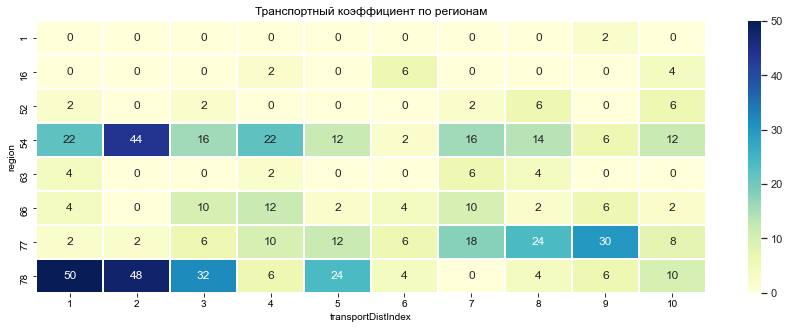

In [10]:
fig, (ax1) = plt.subplots(1,1, figsize=(15,5))
sns.set(style='white')
sns.heatmap(
    transport_df, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu", 
    ax=ax1)
ax1.set_title('Транспортный коэффициент по регионам')

In [11]:
# Отбрасываем как неинформативные те колонки, где пропуски более чем в 30 процентах записей
df = df.dropna(axis=1, thresh=300)
# Для оставшихся данных пропущенным данным присваиваю 0
df = df.fillna(0)

### Анализируем количество выпущенных проектных деклараций по месяцам

In [12]:
def create_plot(df, date_column, year):
    df[date_column] = pd.to_datetime(df[date_column])
    df['years'] = df[date_column].apply(lambda x: x.year)
    df['months'] = df[date_column].apply(lambda x: x.month)
    plot_df = df.query(f"years == {year}")
    plot_df = plot_df[['months', 'id']].groupby(['months'], as_index=False).count()
    sns.set(style='darkgrid')
    sns.relplot(
        x = 'months',
        y = 'id',
        data = plot_df,
        kind = 'line'
    )
    plt.title(f"Заключение проектных деклараций по месяцам {year} года")

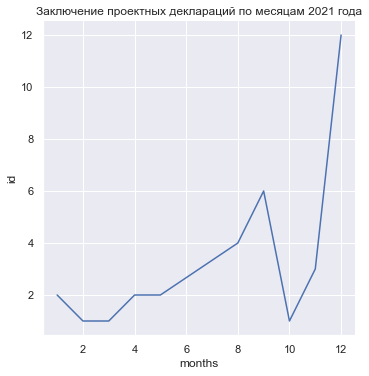

In [13]:
 create_plot(df, 'rpdIssueDttm', 2021)

### Определение дней недели на которые проходится пик продаж, ориентируясь на стоимость объектов

In [14]:
df['rpdIssueDttm'] = pd.to_datetime(df['rpdIssueDttm'])
df['week_day'] = df['rpdIssueDttm'].apply(lambda x: x.day_of_week)
week_dict = {1: 'Понедельник', 2: 'Вторник', 3: 'Среда',
             4: 'Четверг', 5: 'Пятница',6: 'Суббота', 7: 'Воскресенье'}
df['week_day'] = df['week_day'].map(week_dict)

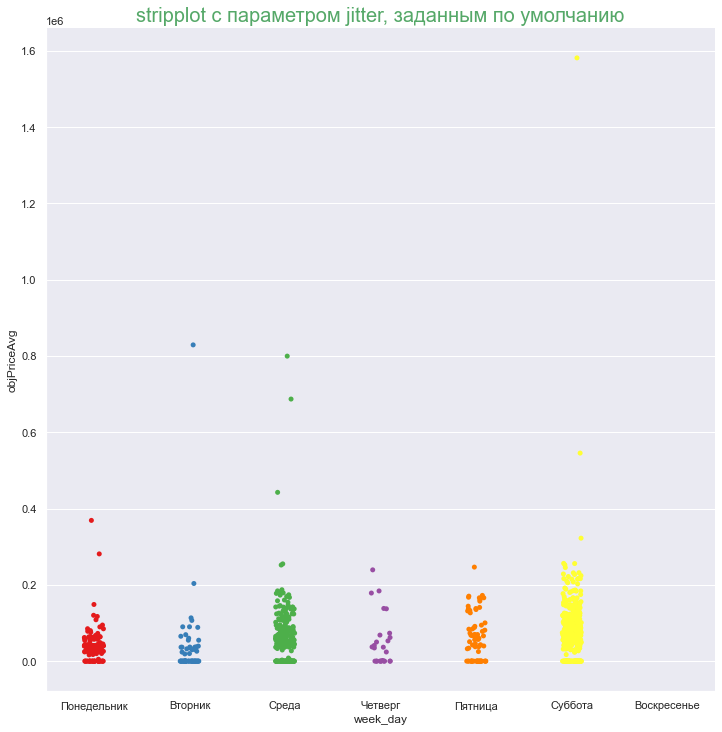

In [15]:
sns.catplot(
    x='week_day',
    y='objPriceAvg', 
    data=df, 
    order=week_dict.values(),
    palette='Set1', 
    height=10,
    aspect=1); 

plt.title('stripplot с параметром jitter, заданным по умолчанию', size=20, color='g');

## Построим график зависимости средней цены объекта недвижимости от региона, где он строится

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,12

#### Добавляю информативности данным - наименование региона согласно кода

In [17]:
regions_names = {1: 'Республика Адыгея', 2: 'Республика Башкортостан', 102:'Республика Башкортостан', 3: 'Республика Бурятия',
103: 'Республика Бурятия', 4: 'Республика Алтай (Горный Алтай)', 5: 'Республика Дагестан', 6: 'Республика Ингушетия',
7: 'Кабардино-Балкарская Республика', 8: 'Республика Калмыкия', 9: 'Республика Карачаево-Черкессия', 10: 'Республика Карелия',
11: 'Республика Коми', 12: 'Республика Марий Эл', 13: 'Республика Мордовия', 113: 'Республика Мордовия',
14: 'Республика Саха (Якутия)', 15: 'Республика Северная Осетия — Алания', 16: 'Республика Татарстан', 116: 'Республика Татарстан',
17: 'Республика Тыва', 18: 'Удмуртская Республика', 19: 'Республика Хакасия', 21: 'Чувашская Республика',
121: 'Чувашская Республика', 22: 'Алтайский край', 23: 'Краснодарский край', 93: 'Краснодарский край',
123: 'Краснодарский край', 24: 'Красноярский край', 84: 'Красноярский край', 88: 'Красноярский край',
124: 'Красноярский край', 25: 'Приморский край', 125: 'Приморский край', 26: 'Ставропольский край',
126: 'Ставропольский край', 27: 'Хабаровский край', 28: 'Амурская область', 29: 'Архангельская область',
30: 'Астраханская область', 31: 'Белгородская область', 32: 'Брянская область', 33: 'Владимирская область',
34: 'Волгоградская область', 134: 'Волгоградская область', 35: 'Вологодская область', 36: 'Воронежская область',
136: 'Воронежская область', 37: 'Ивановская область', 38: 'Иркутская область', 85: 'Иркутская область',
138: 'Иркутская область', 39: 'Калининградская область', 91: 'Калининградская область', 40: 'Калужская область',
41: 'Камчатский край', 42: 'Кемеровская область', 142: 'Кемеровская область', 43: 'Кировская область',
44: 'Костромская область', 45: 'Курганская область', 46: 'Курская область', 47: 'Ленинградская область',
48: 'Липецкая область', 49: 'Магаданская область', 50: 'Московская область', 90: 'Московская область',
150: 'Московская область', 190: 'Московская область', 750: 'Московская область', 51: 'Мурманская область',
52: 'Нижегородская область', 152: 'Нижегородская область', 53: 'Новгородская область', 54: 'Новосибирская область',
154: 'Новосибирская область', 55: 'Омская область', 155: 'Омская область', 56: 'Оренбургская область',
57: 'Орловская область', 58: 'Пензенская область', 59: 'Пермский край', 81: 'Пермский край',
159: 'Пермский край', 60: 'Псковская область', 61: 'Ростовская область', 161: 'Ростовская область',
62: 'Рязанская область', 63: 'Самарская область', 163: 'Самарская область', 64: 'Саратовская область',
164: 'Саратовская область', 65: 'Сахалинская область', 66: 'Свердловская область', 96: 'Свердловская область',
196: 'Свердловская область', 67: 'Смоленская область', 68: 'Тамбовская область', 69: 'Тверская область',
70: 'Томская область', 71: 'Тульская область', 72: 'Тюменская область', 73: 'Ульяновская область',
173: 'Ульяновская область', 74: 'Челябинская область', 174: 'Челябинская область', 75: 'Забайкальский край',
80: 'Забайкальский край', 76: 'Ярославская область', 77: 'г. Москва', 97: 'г. Москва',
99: 'г. Москва', 177: 'г. Москва', 197: 'г. Москва', 199: 'г. Москва',
777: 'г. Москва', 799: 'г. Москва', 78: 'г. Санкт-Петербург', 98: 'г. Санкт-Петербург',
178: 'г. Санкт-Петербург', 79: 'Еврейская автономная область', 82: 'Республика Крым', 83: 'Ненецкий автономный округ',
86: 'Ханты-Мансийский автономный округ — Югра', 186: 'Ханты-Мансийский автономный округ — Югра', 87: 'Чукотский автономный округ', 89: 'Ямало-Ненецкий автономный округ',
92: 'г. Севастополь', 94: 'Территории, находящиеся за пределами РФ и обслуживаемые Департаментом режимных объектов МВД России',95: 'Чеченская республика'}

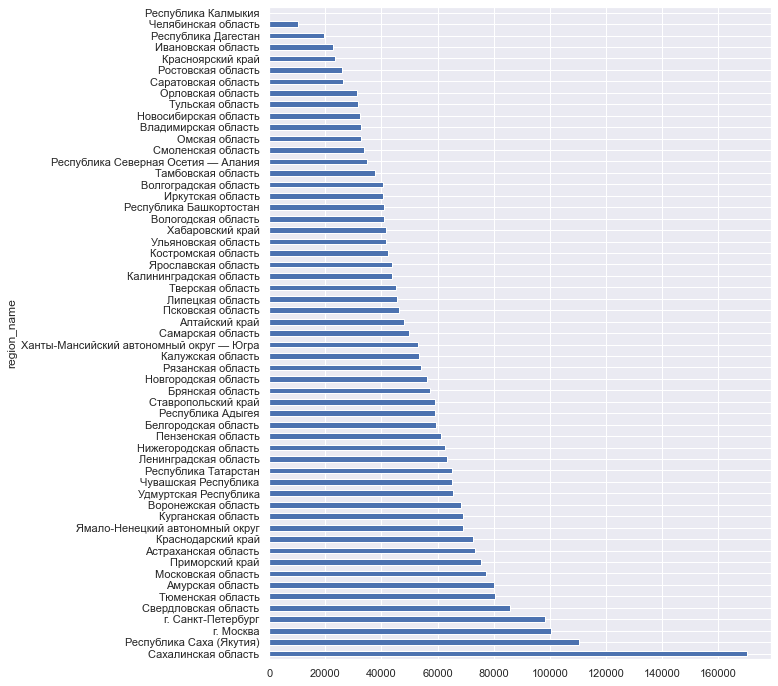

In [18]:
df['region_name'] = df['region'].map(regions_names)
grouped_df = df.groupby('region_name').mean().objPriceAvg
grouped_df.sort_values(ascending=False).plot(kind='barh')
plt.show()

### В какой полосе находится наибольшее количество объектов (график строится по долготе и широте каждого объекта)

Text(12.085, 0.5, 'Широта')

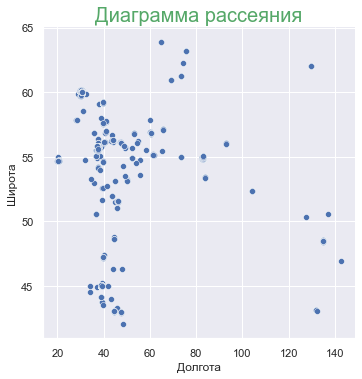

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.relplot(
    x='objLkLongitude',
    y='objLkLatitude',
    data = df
)
plt.title('Диаграмма рассеяния', size=20, color='g');
plt.xlabel('Долгота')
plt.ylabel('Широта')